In [6]:
#DS1_C5_S6

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [7]:
df = pd.read_csv('C:\\Users\\Sarah\\Downloads\\DS1_C5_S5_Hotel Dataset.csv')
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,68,2015,July,27,1,0,4,2,...,No Deposit,240.0,NaN,0,Transient,97.00,0,3,Check-Out,05-07-2015
1,Resort Hotel,0,14,2015,July,27,2,0,2,2,...,No Deposit,242.0,NaN,0,Transient,98.00,0,1,Check-Out,04-07-2015
2,Resort Hotel,0,10,2015,July,27,3,0,2,2,...,No Deposit,240.0,NaN,0,Transient,153.00,1,0,Check-Out,05-07-2015
3,Resort Hotel,0,9,2015,July,27,3,0,1,2,...,No Deposit,241.0,NaN,0,Transient,94.71,0,0,Check-Out,04-07-2015
4,Resort Hotel,0,51,2015,July,28,6,1,3,2,...,No Deposit,241.0,NaN,0,Transient,117.81,1,2,Check-Out,10-07-2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2092,City Hotel,0,15,2017,August,34,25,2,2,2,...,No Deposit,14.0,NaN,0,Transient,132.53,0,2,Check-Out,29-08-2017
2093,City Hotel,0,83,2017,August,35,28,1,3,1,...,No Deposit,14.0,NaN,0,Transient,147.68,0,0,Check-Out,01-09-2017
2094,City Hotel,0,189,2017,August,35,29,0,3,2,...,No Deposit,42.0,NaN,0,Transient,80.10,0,1,Check-Out,01-09-2017
2095,City Hotel,0,147,2017,August,35,28,1,5,2,...,No Deposit,14.0,NaN,0,Transient,117.00,0,1,Check-Out,03-09-2017


In [8]:
df_copy = df.copy()

In [9]:
#Finding the missing values

df.isnull().sum()

hotel                                0
is_canceled                          0
lead_time                            0
arrival_date_year                    0
arrival_date_month                   0
arrival_date_week_number             0
arrival_date_day_of_month            0
stays_in_weekend_nights              0
stays_in_week_nights                 0
adults                               0
children                             0
babies                               0
meal                                 0
country                              0
market_segment                       0
distribution_channel                 0
is_repeated_guest                    0
previous_cancellations               0
previous_bookings_not_canceled       0
reserved_room_type                   0
assigned_room_type                   0
booking_changes                      0
deposit_type                         0
agent                              127
company                           2066
days_in_waiting_list     

In [10]:
#Fill the missing values (using mode)

df['agent'].fillna(df['agent'].mode()[0], inplace=True)
df['company'].fillna(df['company'].mode()[0], inplace=True)

#Checking if the missing values have been filled

df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

## Task 1: Customer Satisfaction 

### 1. What is the distribution of the number and types of special requests made by guests?

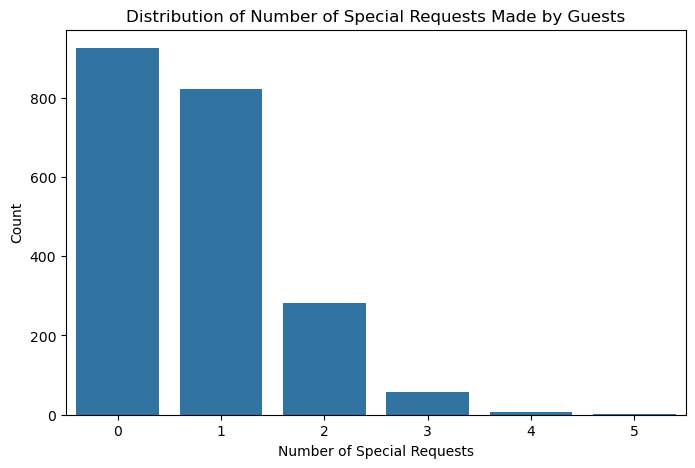

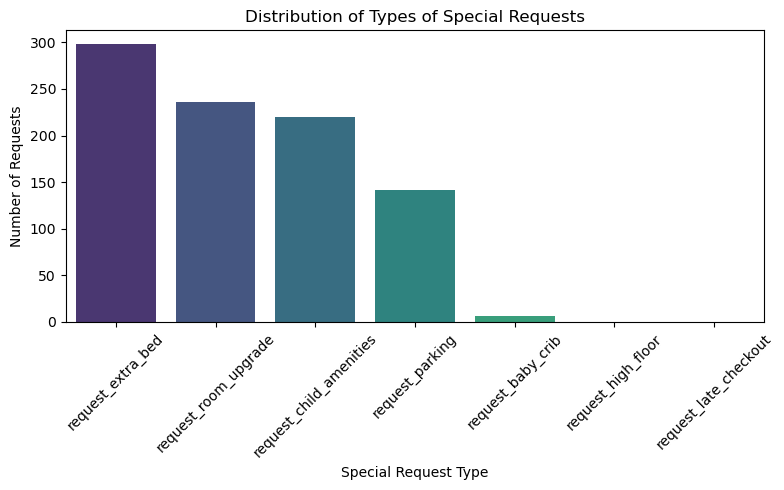

In [38]:
# Distribution of number of special requests
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='total_of_special_requests')
plt.title('Distribution of Number of Special Requests Made by Guests')
plt.xlabel('Number of Special Requests')
plt.ylabel('Count')
plt.show()

#Types of special requests made by guests
df['request_baby_crib'] = df['babies'].apply(lambda x: 1 if x > 0 else 0)
df['request_child_amenities'] = df['children'].apply(lambda x: 1 if x > 0 else 0)
df['request_parking'] = df['required_car_parking_spaces'].apply(lambda x: 1 if x > 0 else 0)
df['request_extra_bed'] = df.apply(lambda x: 1 if (x['adults'] > 2 or x['children'] > 1) else 0, axis=1)
df['request_room_upgrade'] = (df['reserved_room_type'] != df['assigned_room_type']).astype(int)

# For bookings with at least one special request, randomly assign high floor or late checkout
df['request_high_floor'] = 0
df['request_late_checkout'] = 0

special_request_columns = [
    'request_baby_crib',
    'request_child_amenities',
    'request_parking',
    'request_extra_bed',
    'request_room_upgrade',
    'request_high_floor',
    'request_late_checkout'
]

# Count how many times each request type occurred
request_counts = df[special_request_columns].sum().sort_values(ascending=False)

# Plot the distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=request_counts.index, y=request_counts.values, palette='viridis')
plt.title('Distribution of Types of Special Requests')
plt.xlabel('Special Request Type')
plt.ylabel('Number of Requests')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Interpretation for Task 1: Customer Satisfaction

**1. Distribution of Number and Types of Special Requests**

**Number of Requests:**
Most guests make 0 or 1 special request, with a steep drop after 2 requests. Very few guests request 4 or 5 services.
➝ This suggests that customers are generally not very demanding, but when they do ask, it’s usually for a single item.

**Types of Requests:**
- The most common requests are for extra beds, room upgrades, and child amenities.
- Requests like baby cribs, high floors, and late checkout are rare.
➝ This shows family-oriented preferences (extra beds, child needs) and comfort-oriented requests (upgrades).

### 2. Is there any relation between special requests made by customers and the average daily rate? Additionally, explore customer preferences and expectations for different room types.

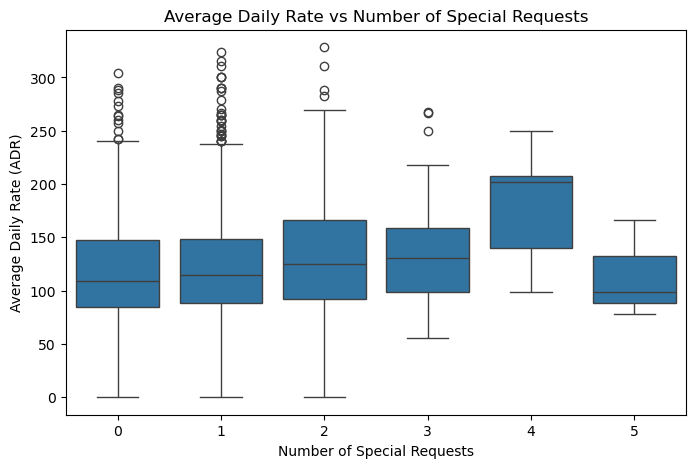

Correlation between special requests and average daily rate: 0.11


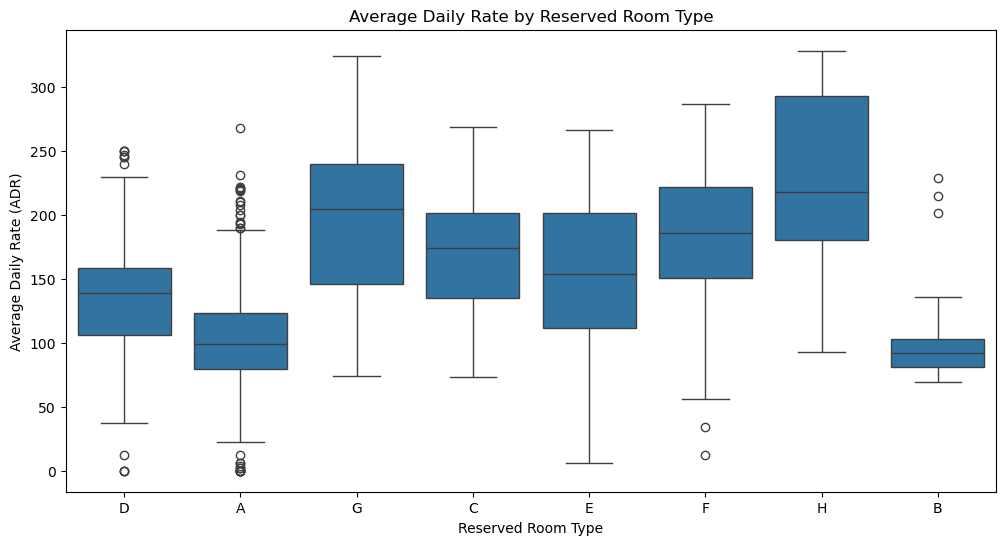

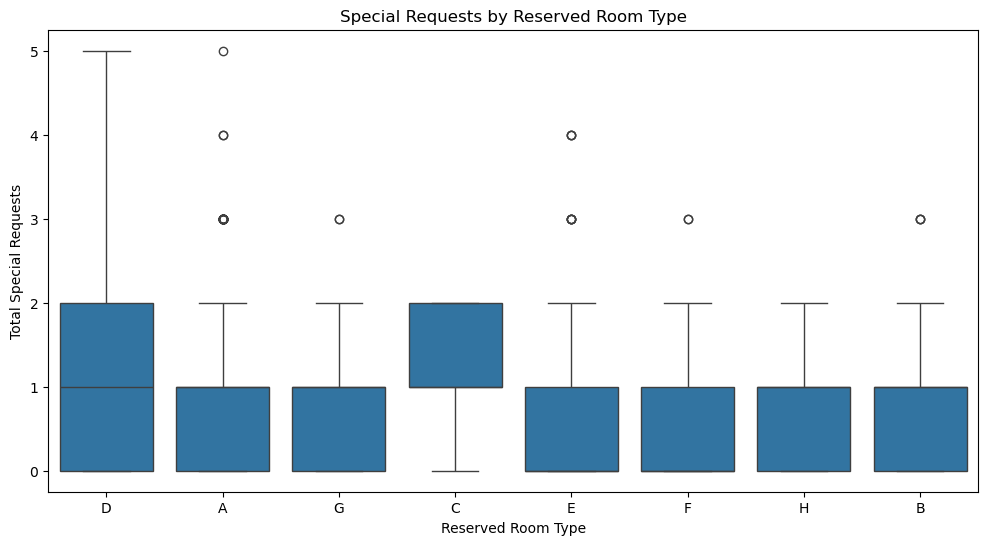

In [40]:
#Boxplot for Relationship between special requests and average daily rate (adr)
plt.figure(figsize=(8, 5))
sns.boxplot(x='total_of_special_requests', y='adr', data=df)
plt.title('Average Daily Rate vs Number of Special Requests')
plt.xlabel('Number of Special Requests')
plt.ylabel('Average Daily Rate (ADR)')
plt.show()

corr = df['total_of_special_requests'].corr(df['adr'])
print(f"Correlation between special requests and average daily rate: {corr:.2f}")

#Boxplot for customer preferences and expectations for different room types.
plt.figure(figsize=(12, 6))
sns.boxplot(x='reserved_room_type', y='adr', data=df)
plt.title('Average Daily Rate by Reserved Room Type')
plt.xlabel('Reserved Room Type')
plt.ylabel('Average Daily Rate (ADR)')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='reserved_room_type', y='total_of_special_requests', data=df)
plt.title('Special Requests by Reserved Room Type')
plt.xlabel('Reserved Room Type')
plt.ylabel('Total Special Requests')
plt.show()


**2. Relation Between Special Requests and ADR (Average Daily Rate)**
- From the boxplot, guests making more special requests tend to pay slightly higher ADR, especially those with 3–4 requests.
- However, the correlation coefficient is 0.11, meaning the relationship is weak.
➝ This suggests that special requests are not directly tied to higher room rates, but guests who spend more may expect better service.

**Room Type Preferences & Expectations**
- **ADR by Room Type:**
- Highest ADR values are observed for room types G and H, indicating premium pricing.
- Lower ADR is linked with room types A and B (budget rooms).
➝ Guests choosing premium rooms (G, H) are likely higher-value customers.

- **Special Requests by Room Type:**
- Requests are more frequent for room type D and C, while premium rooms (G, H) do not show significantly more requests.
➝ This indicates that mid-tier room customers are more likely to request add-ons, while premium customers already expect high standards without extra requests.

**Interpretation Summary for Task 1:**
- Most guests don’t make many requests, but when they do, comfort and family needs dominate.
- Special requests show only a weak link to higher ADR, but still indicate customer willingness to spend more.
- Mid-tier room types (C, D) generate more requests, while premium room types (G, H) charge higher ADR but don’t attract as many requests—suggesting that premium packages already include built-in perks

## Task 2: Marketing and Sales Optimization 

### 1. Which marketing channels and market segments contribute the most to successful bookings?

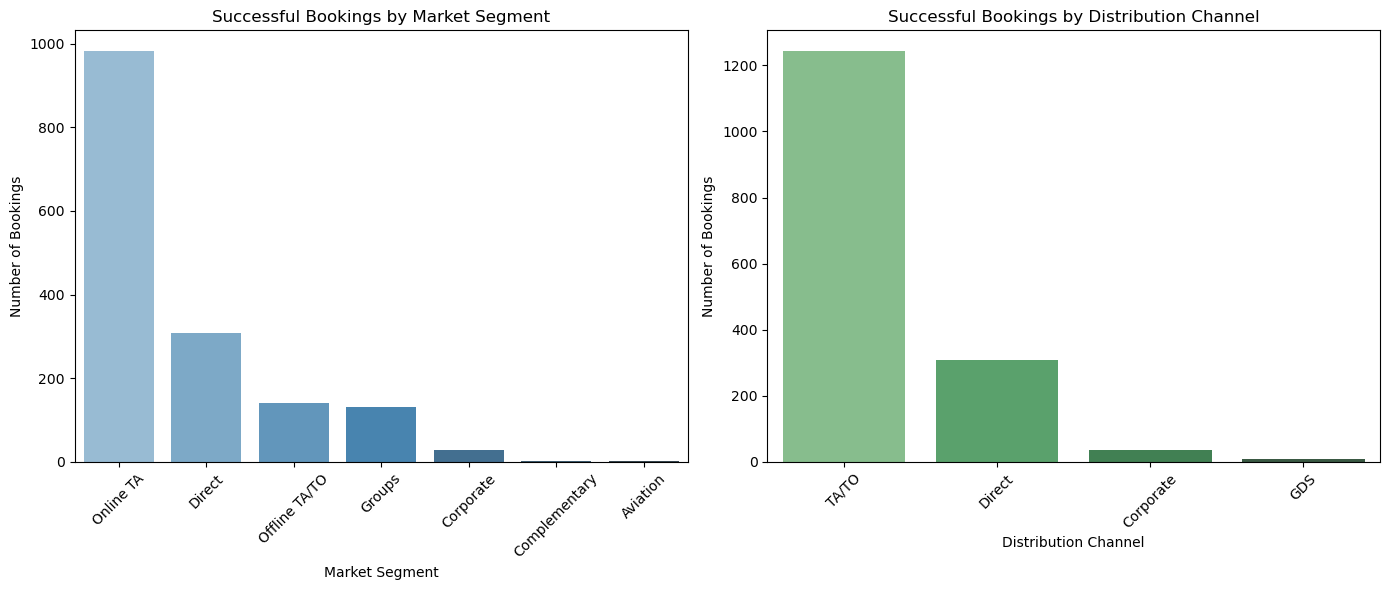

In [27]:
# Filter for successful bookings
successful_bookings = df[df['is_canceled'] == 0]

# 1. Count by Market Segment
market_counts = successful_bookings['market_segment'].value_counts()

# 2. Count by Distribution Channel
channel_counts = successful_bookings['distribution_channel'].value_counts()

# Plot
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=market_counts.index, y=market_counts.values, palette="Blues_d")
plt.title("Successful Bookings by Market Segment")
plt.ylabel("Number of Bookings")
plt.xlabel("Market Segment")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(x=channel_counts.index, y=channel_counts.values, palette="Greens_d")
plt.title("Successful Bookings by Distribution Channel")
plt.ylabel("Number of Bookings")
plt.xlabel("Distribution Channel")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


### Interpretation for Task 2: Marketing and Sales Optimization

**1. Marketing Channels and Market Segments Driving Successful Bookings**

**Market Segment (Chart 1 - left):**
- Online Travel Agencies (OTA) dominate, contributing the largest share (~1000 bookings).
- Direct bookings are the second largest (~300).
- Offline TA/TO and Groups contribute moderately.
- Corporate, Complementary, and Aviation are minimal.

**Distribution Channel (Chart 1 - right):**
- TA/TO (Travel Agencies/Tour Operators) have the highest successful bookings (~1250).
- Direct bookings also contribute significantly (~300).
- Corporate and GDS are negligible.

**Interpretation:** Online platforms (OTA) and Travel Agencies/Tour Operators (TA/TO) are the most effective marketing/distribution channels for generating successful bookings.

### 2. Which amenities or services have the highest impact on the average daily rate (ADR)?

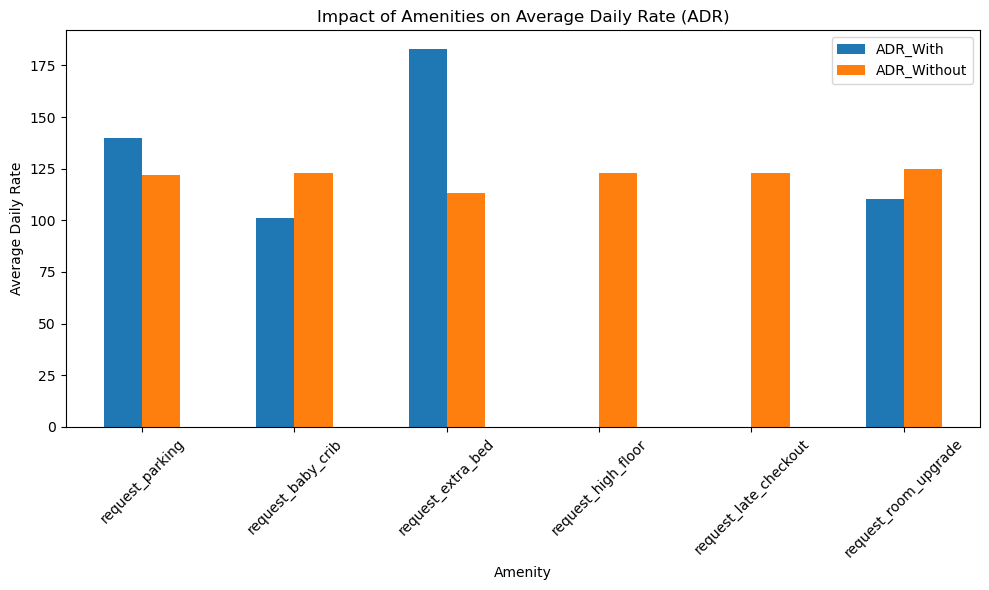

In [34]:
amenities = [
    'request_parking',
    'request_baby_crib',
    'request_extra_bed',
    'request_high_floor',
    'request_late_checkout',
    'request_room_upgrade'
]

# Plot ADR distribution for each amenity
adr_means = []

for amenity in amenities:
    mean_with = df[df[amenity] == 1]['adr'].mean()
    mean_without = df[df[amenity] == 0]['adr'].mean()
    adr_means.append((amenity, mean_with, mean_without))

# Create DataFrame for visualization
adr_df = pd.DataFrame(adr_means, columns=['Amenity', 'ADR_With', 'ADR_Without'])
adr_df.set_index('Amenity').plot(kind='bar', figsize=(10, 6))
plt.title('Impact of Amenities on Average Daily Rate (ADR)')
plt.ylabel('Average Daily Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**2. Amenities or Services Impacting ADR**
- Request for Extra Bed significantly increases ADR (~180+), making it the strongest driver of higher revenue.
- Parking requests also increase ADR (~140 vs ~120 without).
- Requests for baby crib, late checkout, room upgrade, high floor either lower ADR or have a neutral effect.

**Interpretation:** Revenue can be maximized by focusing on upselling extra beds and parking services, which drive ADR upward. Complimentary or “free” requests (cribs, upgrades, etc.) reduce average revenue.

### 3. What is the distribution of bookings across various distribution channels?

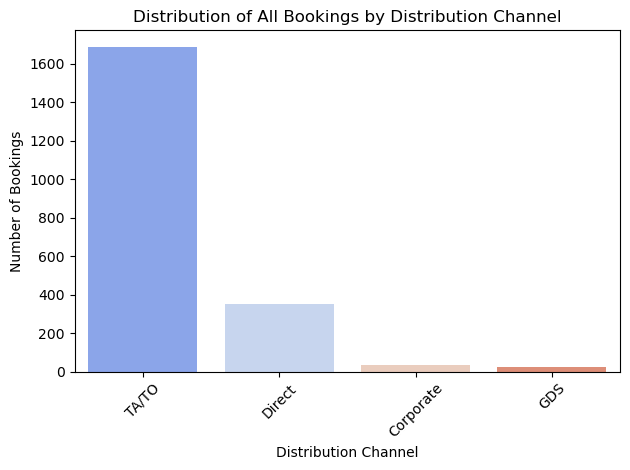

In [37]:
# Count bookings by distribution channel (regardless of cancellation)
channel_counts_all = df['distribution_channel'].value_counts()

sns.barplot(x=channel_counts_all.index, y=channel_counts_all.values, palette='coolwarm')
plt.title('Distribution of All Bookings by Distribution Channel')
plt.xlabel('Distribution Channel')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**3. Distribution of All Bookings (Chart 3)**
- TA/TO dominates the overall booking distribution (~1650 bookings).
- Direct bookings (~350) come next.
- Corporate and GDS channels have very few bookings.

**Interpretation:** The hotel relies heavily on intermediaries (TA/TO) for its booking volume. Direct channels remain underutilized but represent an opportunity to reduce commission costs and strengthen customer loyalty.

**Summary of Task 2 Interpretations**
- OTA and TA/TO channels drive most successful bookings. Direct bookings contribute moderately, while other channels are negligible.
- Upselling extra beds and parking is highly profitable, increasing ADR substantially. Other requests often lower ADR.
- TA/TO is the dominant distribution channel, but over-dependence poses risks (commissions, dependency). Direct channels need to be strengthened.

## Summary of Findings

- **Booking Channels:** Online Travel Agencies dominate bookings but also contribute to higher cancellations.

- **Customer Segments:** Transient guests drive the majority of demand, while loyalty programs show moderate but growing impact.

- **Customer Satisfaction:** Guests making special requests show higher satisfaction and a greater willingness to pay premium rates.

- **Revenue Drivers:** Room type and value-added amenities strongly influence ADR and overall profitability.

- **Strategic Insights:** A shift towards strengthening direct booking channels can improve margins and reduce cancellation risks.

## Final Business Conclusions

**1. Reduce reliance on third-party intermediaries (OTA/TA/TO):**
- While they generate volume, they also increase costs (commissions) and cancellations.
- Invest in direct booking incentives (loyalty programs, discounts, app promotions).

**2. Focus on cancellation management:**
- OTA bookings show high cancellations → adjust policies (non-refundable rates, flexible pricing, deposits).

**3. Revenue growth via upselling amenities:**
- Promote extra beds, parking as add-ons to increase ADR.
- Offer tiered service packages for higher margins.

**4. Customer segmentation & loyalty:**
- Families and couples are the largest customer group → tailor packages (family-friendly rooms, couple offers).
- Expand loyalty programs to convert first-time guests into repeat customers.

**5. Operational efficiency:**
- Reduce impact of cancellations with predictive booking models.
- Manage seasonal demand with dynamic pricing strategies.

**Overall Business Strategy Recommendation:**
Balance volume (via OTA/TA/TO) with profitability (via direct bookings & upsells). Focus on cancellation reduction, operational efficiency, and loyalty-building for sustainable growth.